In [26]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00471/Data_for_UCI_named.csv', low_memory = False)
#check distribution of target variable
#prints
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [27]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [28]:
df = df.drop('stab', axis = 1)

In [29]:
# Splitting the data

X = df.drop('stabf', axis = 1)
y = df['stabf']

In [30]:
# Splitting the data into testing and training sets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
scaler = StandardScaler()

In [32]:
# Transforming the x_train and x_test 

trans_x_train = scaler.fit_transform(x_train)
trans_x_train = pd.DataFrame(trans_x_train, columns = x_train.columns)
trans_x_test = scaler.transform(x_test)
trans_x_test = pd.DataFrame(trans_x_test, columns = x_test.columns)

In [33]:
trans_x_test

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.593951,-0.412733,1.503924,1.116943,0.403423,-1.492971,-0.785033,1.566781,-0.901007,1.167203,-1.507330,1.084726
1,0.202190,0.374416,-0.188800,-0.522268,-0.225967,-1.058483,0.420047,1.028627,-1.625721,-0.395660,1.414651,1.226011
2,-1.079044,-0.313745,-0.884634,0.017080,-0.943122,0.112653,0.801335,0.733004,1.457108,-1.438495,0.651821,-1.682168
3,-0.083120,-1.107327,0.372805,-1.708152,0.753990,-1.637972,0.403805,-0.088036,0.083322,-1.672322,-0.357714,1.055865
4,0.873921,1.438466,0.086662,1.715037,-0.153880,-0.007015,-0.197053,0.472315,0.136549,-1.469731,0.956396,-0.819727
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.119679,-0.675220,-1.382912,1.287865,0.249565,-0.803325,0.734497,-0.369263,0.485786,-0.115528,-1.264683,-1.283117
1996,-1.077913,-0.808691,1.033449,0.337636,-0.166587,0.340913,0.988085,-1.035753,0.952386,0.892766,-1.062502,-1.094114
1997,0.947825,-1.663727,-1.653920,0.532665,-1.518329,1.590144,0.091613,0.974455,-1.233963,0.126391,0.573445,1.319350
1998,-1.120235,0.193979,-0.237805,0.421570,-1.162671,0.738702,0.027367,1.265833,1.524336,0.794087,-1.362323,-0.801971


In [34]:
trans_x_train

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.367327,-0.986042,0.650447,1.547527,-0.291490,0.061535,1.293862,-0.845074,0.160918,0.339859,0.585568,0.492239
1,-0.064659,0.089437,1.035079,-1.641494,0.619865,-0.067235,-1.502925,0.486613,-0.293143,-1.558488,1.429649,-1.443521
2,-1.467850,1.298418,-0.502536,1.166046,-0.180521,0.490603,0.682560,-0.855302,1.399350,1.451534,-1.045743,0.492489
3,0.820081,0.529920,1.299657,-1.141975,-0.812854,-0.763632,1.521579,0.658780,-0.958319,1.361958,1.604140,0.275303
4,0.665424,-1.425627,0.312300,0.919137,-1.614296,0.760315,1.422019,0.639243,1.676895,0.695660,1.137504,-1.312575
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.551314,0.007408,-1.177640,1.016898,-0.397177,0.759820,-0.636951,0.572703,-1.209413,0.313976,-1.625728,-0.637401
7996,1.015925,-0.223483,-1.489381,-1.479078,0.451468,-0.731994,0.990355,-1.048148,-1.094647,-0.755209,0.734821,-0.304433
7997,0.657609,-0.722756,-1.405888,-0.274301,-0.012584,1.438694,-0.364266,-1.046683,1.253539,0.293100,-1.550587,0.810344
7998,-0.059316,-1.260532,-1.010471,-0.877808,-0.779769,0.828824,0.516923,0.018984,-0.182448,-0.388255,-0.726781,1.667916


In [35]:
# Q.1
Precision = (355) / (355 + 1480) 
Recall =  (355) / (355 + 45) 
F1_Score = (2 * Precision * Recall) / (Precision + Recall)
print(round(F1_Score,4))

0.3177


In [36]:
#RANDOM FOREST CLASSIFICATION
# Q.14
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(trans_x_train, y_train)

RandomForestClassifier(random_state=1)

In [37]:
preds = rf_model.predict(trans_x_test)

In [38]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, preds)

In [39]:
print(round(accuracy,4))

0.929


In [40]:
# xgboost
from xgboost import XGBClassifier
extreme = XGBClassifier(random_state = 1)
extreme.fit(trans_x_train, y_train)

C:\Users\Admin\anaconda3\envs\Python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:53:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
extreme_pred = extreme.predict(trans_x_test)

In [42]:
xgb_acc = accuracy_score(y_test, extreme_pred)

In [43]:
# Q.14
round(xgb_acc,4)

0.9455

In [44]:
import lightgbm as lgbm
lgb = lgbm.LGBMClassifier(random_state=1)
lgb.fit(trans_x_train, y_train)
lgbm_preds  = lgb.predict(trans_x_test)

In [45]:
round(accuracy_score(y_test, lgbm_preds),4)

0.9395

In [46]:
# Q.17
# extratreesclassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV 
Etc = ExtraTreesClassifier(random_state = 1)

In [47]:
#  Given we are to use this parameters to answer the question

n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None] 

hyperparameter_grid = {'n_estimators': n_estimators,

                       'min_samples_leaf': min_samples_leaf,

                       'min_samples_split': min_samples_split,

                       'max_features': max_features}

In [48]:
# using the parameters given to instantiate

RSCV = RandomizedSearchCV(estimator = Etc, 
                          param_distributions = hyperparameter_grid, 
                          random_state = 1, 
                          cv = 5, 
                          n_iter = 10, 
                          scoring = 'accuracy',
                          n_jobs = 1, 
                          verbose=1)

In [49]:
# fitting the parameters into the training data

RSCV_search = RSCV.fit(trans_x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [51]:
RSCV_search.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': None}

In [52]:
# Q.18
# Extra trees classification without tuning

ETC = ExtraTreesClassifier(random_state=1)
ETC.fit(trans_x_train, y_train)
ETC_pred = ETC.predict(trans_x_test)


In [53]:
round(accuracy_score(y_test, ETC_pred),4)

0.928

In [56]:
#Using the Optimized parameter to test the model's performance

best_Etc = ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, 
                                 min_samples_leaf=8, max_features=None)

best_Etc.fit(trans_x_train, y_train)
best_Etc_preds = best_Etc.predict(trans_x_test)

In [57]:
round(accuracy_score(y_test, best_Etc_preds),4)

0.9295

In [58]:
# Q.20
import matplotlib.pyplot as plt
%matplotlib inline

tau1    0.137728
tau2    0.140895
tau3    0.133572
tau4    0.135114
p1      0.003820
p2      0.005464
p3      0.005370
p4      0.004978
g1      0.102403
g2      0.108422
g3      0.112557
g4      0.109678
dtype: float64

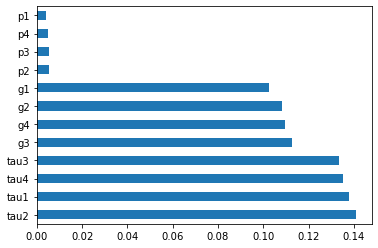

In [59]:
feat_importances = pd.Series(best_Etc.feature_importances_, index = X.columns)
feat_importances.nlargest(12).plot(kind='barh')
feat_importances